# Importing necessary libraries

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

## Load the dataset

In [59]:
data = pd.read_csv("/Users/tenzinyonten/Desktop/python/musicpro/data.csv")

### Display the first few rows of the dataset

In [60]:
data.head()

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00000.wav,0.349943,0.130225,1784.420446,2002.650192,3806.485316,0.083066,-113.596748,121.557297,-19.158825,...,8.810669,-3.667368,5.751691,-5.162763,0.750948,-1.691938,-0.409953,-2.300209,1.219929,blues
1,blues.00001.wav,0.340983,0.095918,1529.835316,NaN,3548.820207,0.056044,-207.556793,124.006721,8.930560,...,5.376803,-2.239120,4.216963,-6.012273,0.936110,-0.716537,0.293876,-0.287431,0.531573,blues
2,blues.00002.wav,0.363603,0.175573,1552.481958,1747.165985,3040.514948,0.076301,-90.754387,140.459900,-29.109968,...,5.789265,-8.905224,-1.083720,-9.218359,2.455806,-7.726901,-1.815723,-3.433434,-2.226821,blues
3,blues.00003.wav,0.404779,0.141191,1070.119953,1596.333948,2185.028454,0.033309,-199.431152,150.099213,5.647593,...,6.087677,-2.476421,-1.073890,-2.874778,0.780977,-3.316932,0.637982,-0.619690,-3.408233,blues
4,blues.00004.wav,0.308590,0.091563,1835.494603,1748.362448,3580.945013,0.101500,-160.266037,126.198807,-35.605450,...,-2.806384,-6.934123,-7.558618,-9.173553,-4.512165,-5.453538,-0.924161,-4.409333,-11.703781,blues


### Check for missing values

In [61]:
data.isnull().sum()

filename               0
chroma_stft            0
rmse                   0
spectral_centroid     15
spectral_bandwidth    21
rolloff                0
zero_crossing_rate     0
mfcc1                  0
mfcc2                  0
mfcc3                  0
mfcc4                  0
mfcc5                  0
mfcc6                  0
mfcc7                  0
mfcc8                  0
mfcc9                  0
mfcc10                 0
mfcc11                 0
mfcc12                 0
mfcc13                 0
mfcc14                 0
mfcc15                 0
mfcc16                 0
mfcc17                 0
mfcc18                 0
mfcc19                 0
mfcc20                 0
label                  0
dtype: int64

## Impute missing values with the mean

In [62]:
missing_value_columns = ['spectral_centroid', 'spectral_bandwidth']
imputer = SimpleImputer(strategy="mean")
data[missing_value_columns] = imputer.fit_transform(data[missing_value_columns])

#### Check if there are any missing values remaining

In [63]:
data.isnull().sum()

filename              0
chroma_stft           0
rmse                  0
spectral_centroid     0
spectral_bandwidth    0
rolloff               0
zero_crossing_rate    0
mfcc1                 0
mfcc2                 0
mfcc3                 0
mfcc4                 0
mfcc5                 0
mfcc6                 0
mfcc7                 0
mfcc8                 0
mfcc9                 0
mfcc10                0
mfcc11                0
mfcc12                0
mfcc13                0
mfcc14                0
mfcc15                0
mfcc16                0
mfcc17                0
mfcc18                0
mfcc19                0
mfcc20                0
label                 0
dtype: int64

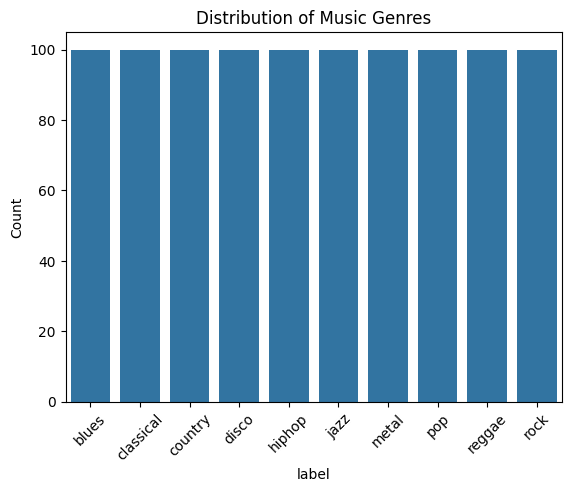

In [64]:
sns.countplot(data=data, x='label')
plt.title('Distribution of Music Genres')
plt.ylabel('Count')
plt.xlabel('label')
plt.xticks(rotation=45)
plt.show()

## Split data into features (X) and target (y)

In [65]:
# Split data into features and target
X = data.drop(['filename', 'label'], axis=1)
y = data["label"]


### Split the data into training and testing sets

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99992)

### Standardize features

In [67]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Define parameter grid for Random Forest Classifier

In [68]:
# Random Forest Classifier
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

## Initialize and fit Random Forest Classifier

In [69]:
rf_clf = RandomForestClassifier(random_state=992)
grid_search_rf = GridSearchCV(rf_clf, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)
best_params_rf = grid_search_rf.best_params_

In [70]:
model_rf = RandomForestClassifier(**best_params_rf, random_state=99942)
model_rf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200, random_state=99942)

## Define parameter grid for SVM Classifier

In [71]:
param_grid_svm = {
    'svc__C': [0.1, 1, 10],
    'svc__kernel': ['linear', 'rbf', 'poly']
}

## Initialize and fit SVM Classifier

In [72]:
svm_clf = make_pipeline(StandardScaler(), SVC(probability=True, random_state=99942))
grid_search_svm = GridSearchCV(svm_clf, param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)
best_params_svm = grid_search_svm.best_params_

In [73]:
model_svm = make_pipeline(StandardScaler(), SVC(C=best_params_svm['svc__C'], kernel=best_params_svm['svc__kernel'], probability=True, random_state=942))
model_svm.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=10, probability=True, random_state=942))])

## Make predictions using Random Forest Classifier

In [74]:
y_pred_rf = model_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average="weighted")
recall_rf = recall_score(y_test, y_pred_rf, average="weighted")
f1_rf = f1_score(y_test, y_pred_rf, average="weighted")


In [75]:
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)


### Plot confusion matrix for Random Forest Classifier

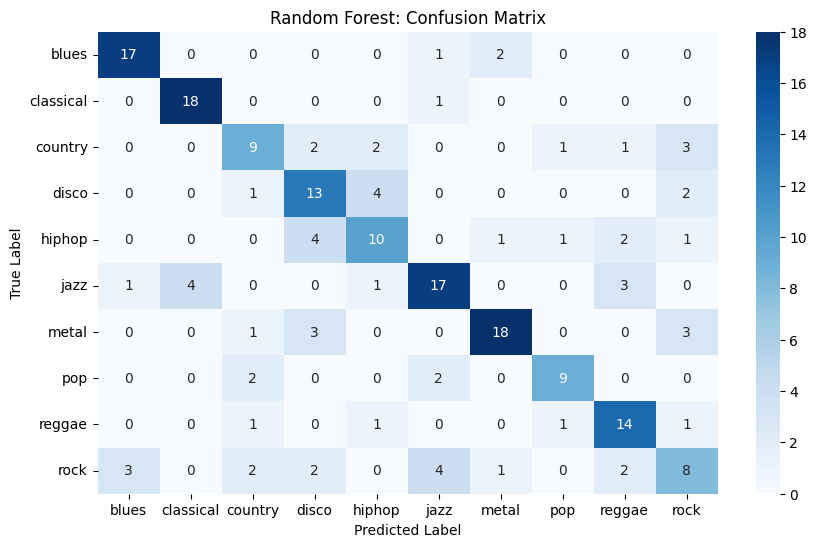

In [76]:
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=model_rf.classes_, yticklabels=model_rf.classes_)
plt.title('Random Forest: Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Make predictions using SVM Classifier

In [77]:
y_pred_svm = model_svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average="weighted")
recall_svm = recall_score(y_test, y_pred_svm, average="weighted")
f1_svm = f1_score(y_test, y_pred_svm, average="weighted")

In [78]:
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

## Plot confusion matrix for SVM Classifier

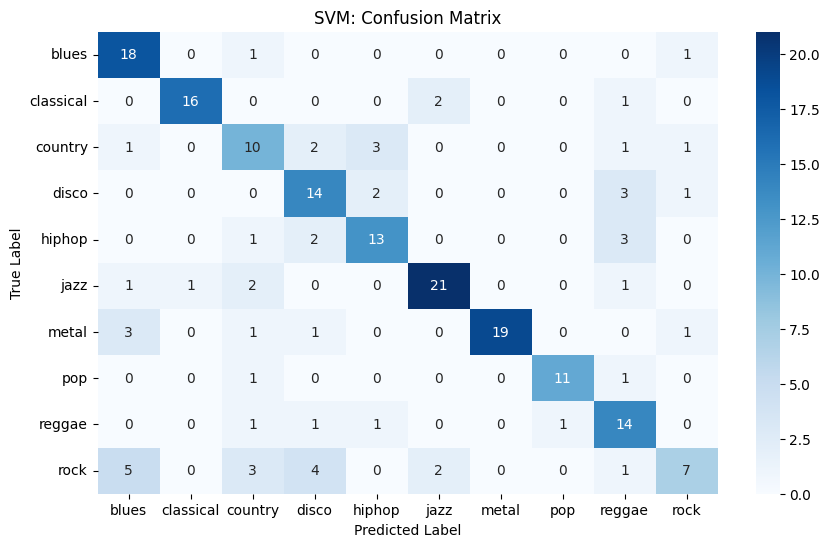

In [79]:
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=model_svm.classes_, yticklabels=model_svm.classes_)
plt.title('SVM: Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


## Display evaluation metrics for Random Forest Classifier

In [80]:
print("Random Forest Classifier Evaluation:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1-Score:", f1_rf)
print()

Random Forest Classifier Evaluation:
Accuracy: 0.665
Precision: 0.6618334415584415
Recall: 0.665
F1-Score: 0.6606421301981544



## Display evaluation metrics for SVM Classifier

In [81]:
print("SVM Classifier Evaluation:")
print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1-Score:", f1_svm)

SVM Classifier Evaluation:
Accuracy: 0.715
Precision: 0.7362141456582633
Recall: 0.715
F1-Score: 0.7129339159468543


### Convert labels to one-hot encoded format

In [82]:
y_test_one_hot_rf = label_binarize(y_test, classes=model_rf.classes_)
y_test_one_hot_svm = label_binarize(y_test, classes=model_svm.classes_)


## Compute ROC curve and ROC area for each class

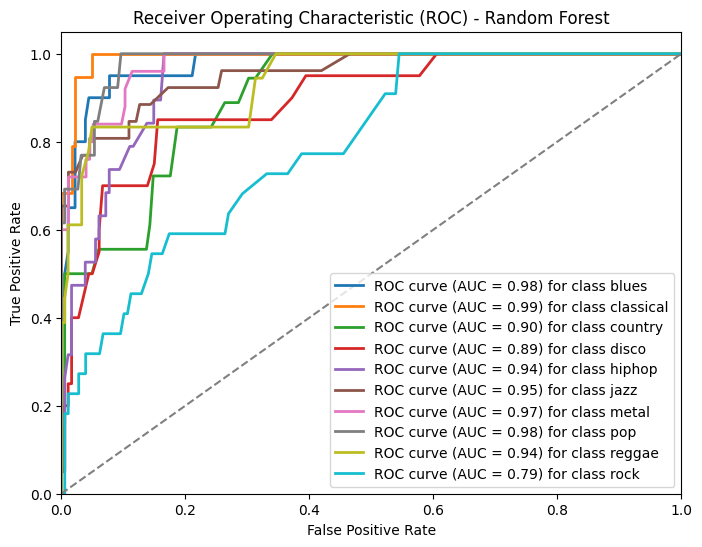

In [83]:
y_prob_rf = model_rf.predict_proba(X_test)
fpr_rf = dict()
tpr_rf = dict()
roc_auc_rf = dict()
for i in range(len(model_rf.classes_)):
    fpr_rf[i], tpr_rf[i], _ = roc_curve(y_test_one_hot_rf[:, i], y_prob_rf[:, i])
    roc_auc_rf[i] = auc(fpr_rf[i], tpr_rf[i])

# Plot ROC curve for Random Forest
plt.figure(figsize=(8, 6))
for i in range(len(model_rf.classes_)):
    plt.plot(fpr_rf[i], tpr_rf[i], lw=2, label='ROC curve (AUC = %0.2f) for class %s' % (roc_auc_rf[i], model_rf.classes_[i]))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Random Forest')
plt.legend(loc="lower right")
plt.show()




## Compute ROC curve and ROC area for each class

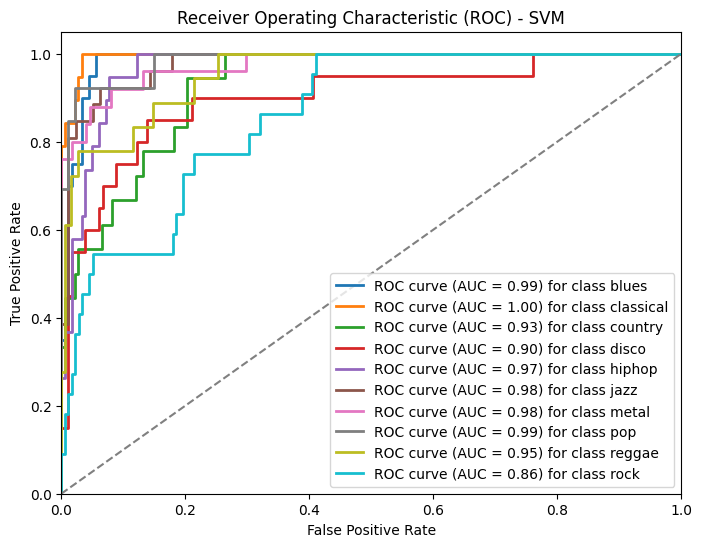

In [84]:
y_prob_svm = model_svm.predict_proba(X_test)

fpr_svm = dict()
tpr_svm = dict()
roc_auc_svm = dict()
for i in range(len(model_svm.classes_)):
    fpr_svm[i], tpr_svm[i], _ = roc_curve(y_test_one_hot_svm[:, i], y_prob_svm[:, i])
    roc_auc_svm[i] = auc(fpr_svm[i], tpr_svm[i])

# Plot ROC curve for SVM
plt.figure(figsize=(8, 6))
for i in range(len(model_svm.classes_)):
    plt.plot(fpr_svm[i], tpr_svm[i], lw=2, label='ROC curve (AUC = %0.2f) for class %s' % (roc_auc_svm[i], model_svm.classes_[i]))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - SVM')
plt.legend(loc="lower right")
plt.show()
